<a href="https://colab.research.google.com/github/ChaitanyaAwasthi/Fashion_MNIST/blob/main/MultiClassification_Neural_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fashion Mnist classification model

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Data {already divided into training and testing datasets...}
# we can import these sets by using tuples ds.

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"training sample:{train_data[0]}")
print(f"training labels:{train_labels[0]}")

training sample:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [ ]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

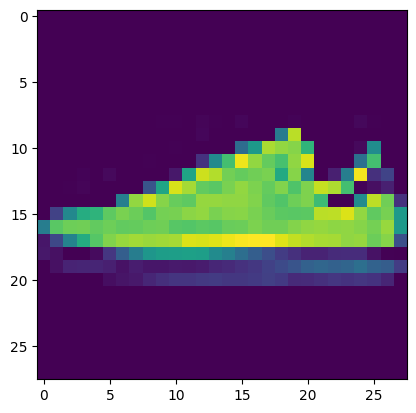

In [ ]:
# plot a single sample
# label basically describing what the image is
import matplotlib.pyplot as plt
plt.imshow(train_data[6]);

In [ ]:
# create a small so we can index onto our training label so they're human readable

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


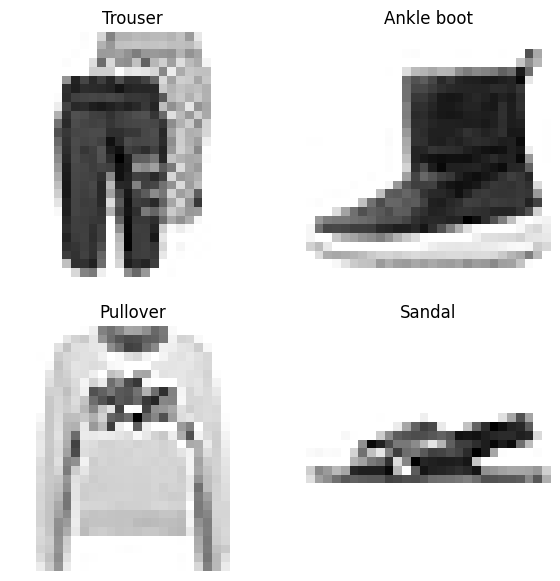

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


### Building a multiclass classification model
---
* we can use our binary classification model's code but we have to tweak some things.
* input shape ( in this case) = (28, 28) ( shape of one image )
* Output Shape = 10 (one per class image)
* loss function = tf.keras.losses.CategoricalCrossentropy
* output activation = softmax function ( not sigmoid)


In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten')>

* Categorical Crossentropy expects us to provide data in one-hot encoded form. Whereas if you wanna provide data in integers, you have to use SparseCrossentropy

In [ ]:
tf.random.set_seed(42)

# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # converts it into one long vector
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

non_norm_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8104 - accuracy: 0.2537 - val_loss: 1.6109 - val_accuracy: 0.3211
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5390 - accuracy: 0.3410 - val_loss: 1.5053 - val_accuracy: 0.3440
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5020 - accuracy: 0.3280 - val_loss: 1.4605 - val_accuracy: 0.3398
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4562 - accuracy: 0.3507 - val_loss: 1.4403 - val_accuracy: 0.3599
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4759 - accuracy: 0.3545 - val_loss: 1.5527 - val_accuracy: 0.3259
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4263 - accuracy: 0.3639 - val_loss: 1.4248 - val_accuracy: 0.3644
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4234 - accuracy: 0.3603 - val_loss: 1.4651 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Normalise Data

In [ ]:
# this will basically turn the range into (0, 1)

train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

normalised_history = model.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2625 - accuracy: 0.5717 - val_loss: 0.9111 - val_accuracy: 0.6308
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8380 - accuracy: 0.6618 - val_loss: 0.8131 - val_accuracy: 0.6831
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7462 - accuracy: 0.7280 - val_loss: 0.7557 - val_accuracy: 0.7391
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6763 - accuracy: 0.7773 - val_loss: 0.6765 - val_accuracy: 0.7782
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6289 - accuracy: 0.7909 - val_loss: 0.6514 - val_accuracy: 0.7842
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5999 - accuracy: 0.7984 - val_loss: 0.6284 - val_accuracy: 0.7891
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5791 - accuracy: 0.8061 - val_loss: 0.6090 - val_accuracy:

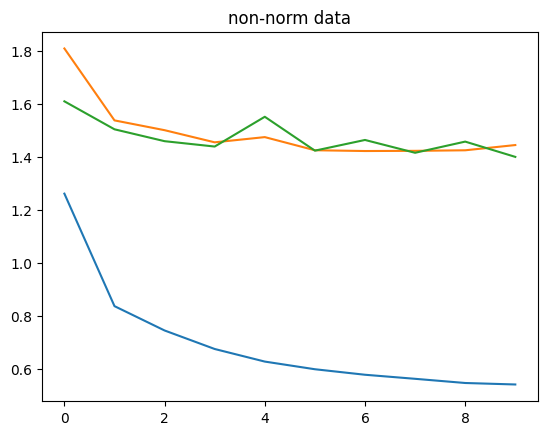

In [ ]:
import matplotlib.pyplot as plt
# we have to input every variable into it (using the matplotlib library)

plt.plot(normalised_history.history['loss'])
plt.title("Normalised Data")
plt.plot(non_norm_history.history['loss'])
plt.title('non-norm data')
plt.plot(non_norm_history.history['val_loss'])

<Axes: title={'center': 'non-norm data'}>

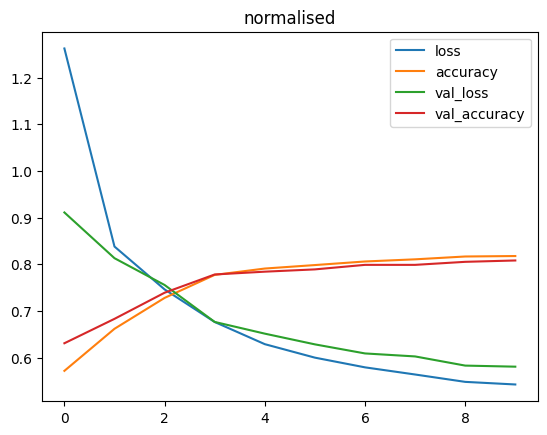

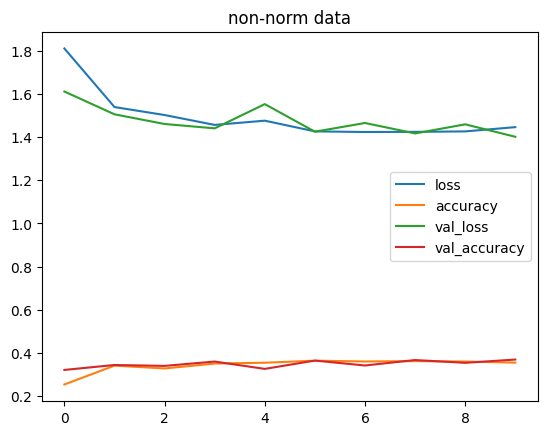

In [ ]:
# using pandas
import pandas as pd
pd.DataFrame(normalised_history.history).plot(title='normalised')
pd.DataFrame(non_norm_history.history).plot(title='non-norm data')

### Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20) )

lr_history = model.fit(train_data_norm, train_labels, epochs=30, validation_data=(train_data_norm, train_labels), callbacks=[lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2510 - accuracy: 0.5974 - val_loss: 0.9120 - val_accuracy: 0.7097 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8127 - accuracy: 0.7461 - val_loss: 0.7276 - val_accuracy: 0.7717 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6997 - accuracy: 0.7770 - val_loss: 0.6743 - val_accuracy: 0.7825 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6577 - accuracy: 0.7844 - val_loss: 0.6135 - val_accuracy: 0.8020 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6275 - accuracy: 0.7905 - val_loss: 0.5814 - val_accuracy: 0.8064 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6011 - accuracy: 0.7923 - val_loss: 0.5891 - val_accuracy: 0.7885 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 6s

In [ ]:
1e-3

0.001

### ideal learning rate curve

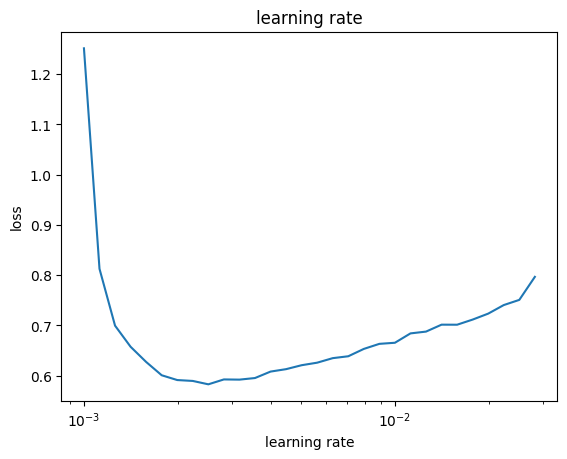

In [ ]:
import matplotlib.pyplot as plt


lrs = 1e-3 * 10**(tf.range(30)/20)
plt.semilogx(lrs, lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate')
plt.show()


In [ ]:
# using the ideal learning rate

tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_history = model.fit(train_data_norm, train_labels, epochs=30, validation_data=(train_data_norm, train_labels),
                       callbacks=[lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2119 - accuracy: 0.5527 - val_loss: 0.9159 - val_accuracy: 0.6307 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8452 - accuracy: 0.6672 - val_loss: 0.7982 - val_accuracy: 0.7023 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7167 - accuracy: 0.7276 - val_loss: 0.6611 - val_accuracy: 0.7495 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6579 - accuracy: 0.7527 - val_loss: 0.6287 - val_accuracy: 0.7629 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6289 - accuracy: 0.7719 - val_loss: 0.6161 - val_accuracy: 0.7801 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6125 - accuracy: 0.7814 - val_loss: 0.6011 - val_accuracy: 0.7876 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 7s

### make some predictions

In [ ]:
# probs --> prediction probabilities
y_probs = model.predict(test_data_norm)

y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])], class_names[test_labels[0]]

313/313 [==============================] - 1s 1ms/step


(array([8.7441782e-05, 2.0032733e-06, 9.8226801e-06, 5.7960909e-07,
        8.0333575e-07, 3.9208841e-02, 9.4312281e-06, 5.9865102e-02,
        1.2201344e-03, 8.9959574e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot',
 'Ankle boot')

In [ ]:
y_preds = y_probls

NameError: ignored

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1) # gives out the max value of each row ( an array of it )
y_preds[:10]

array([9, 2, 1, 1, 0, 1, 4, 4, 8, 7])

In [ ]:
len(y_preds), len(test_labels)

(10000, 10000)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(y_preds, test_labels)

ValueError: ignored

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[886,   1,   7,  39,  53,   0,   1,   0,  13,   0],
       [  8, 899,  17,  43,  31,   0,   1,   0,   1,   0],
       [100,   0, 552,   2, 338,   0,   2,   0,   6,   0],
       [104,   5,   3, 605, 274,   0,   4,   1,   4,   0],
       [ 25,   0, 126,   0, 840,   0,   1,   0,   8,   0],
       [  0,   1,   0,   0,   0, 554,   0,  85, 219, 141],
       [391,   0, 107,  11, 473,   0,   2,   0,  16,   0],
       [  0,   0,   0,   0,   0,   5,   0, 661, 239,  95],
       [ 36,   0,  12,   6,   7,   5,   0,   4, 929,   1],
       [  0,   0,   0,   0,   0,   2,   0,  30,   3, 965]])

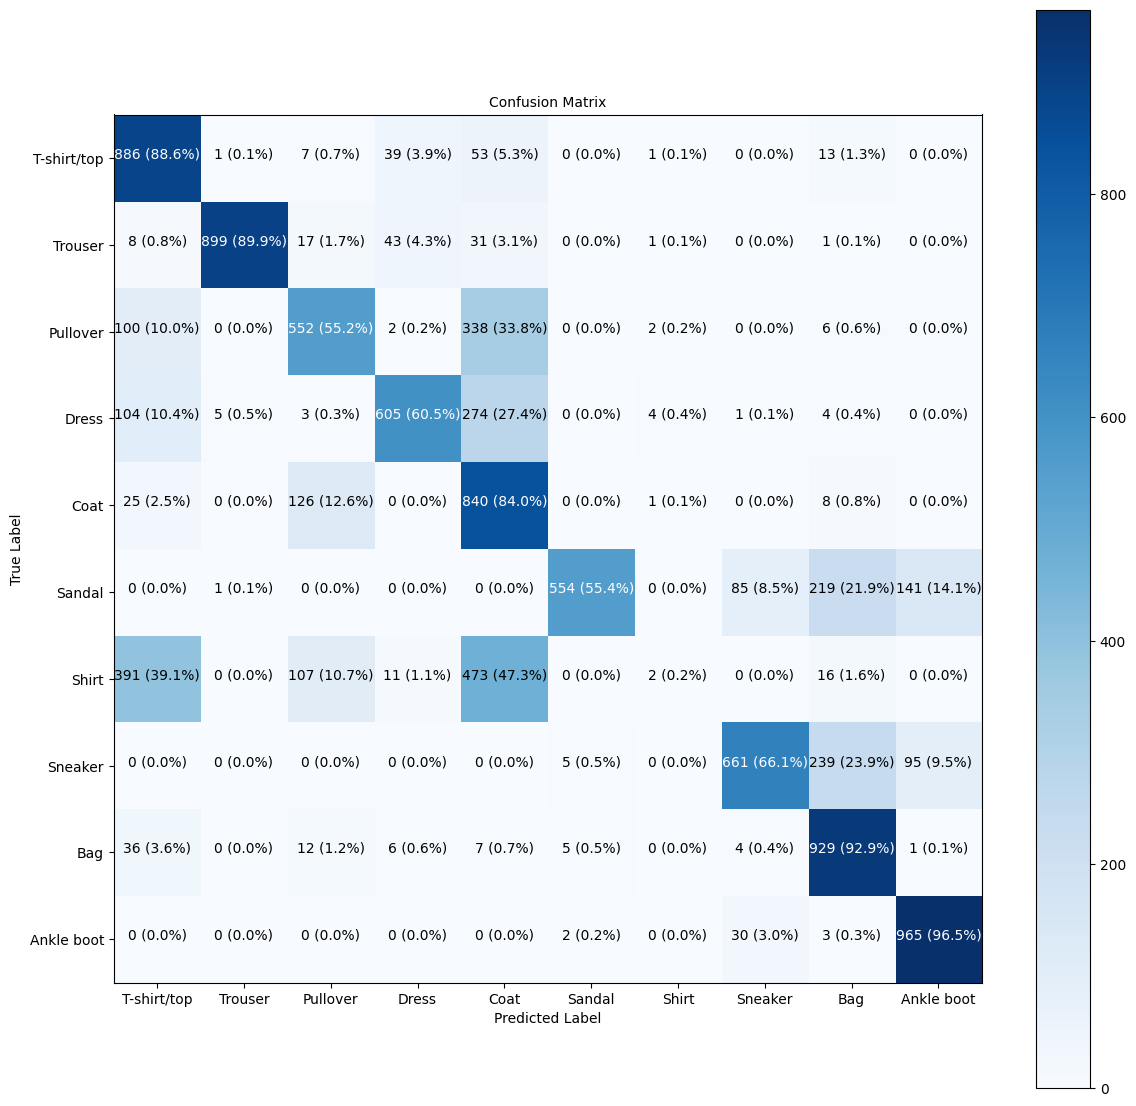

In [ ]:
# Make a prettier confusion matrix
import numpy as np
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(14, 14),
                      text_size=10)



1.   List item
2.   List item



In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 19ms/step


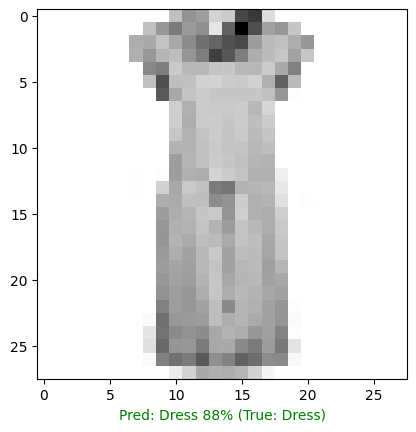

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)